# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [12]:
websites = pd.read_csv("website.csv")

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [26]:
#viewing the sample data
websites.sample(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1585,B0_1093,92,19,UTF-8,Apache/2.4.7 (Ubuntu),5610.0,US,MI,8/07/1996 0:00,27/09/2012 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1100,B0_1249,57,11,utf-8,Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1....,5796.0,US,Arizona,14/02/2000 0:00,14/02/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1224,B0_2210,61,12,UTF-8,Server,NaN,US,NV,1/11/1994 0:00,30/04/2014 0:00,...,8,7,1344,20,10,739,1344,20,0.0,0
1343,B0_1098,69,13,UTF-8,nginx/1.12.0,13920.0,CA,ONTARIO,13/05/2011 0:00,13/05/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1521,M4_64,83,17,utf-8,Microsoft-IIS/6.0,NaN,US,California,18/06/2003 0:00,14/06/2016 0:00,...,1,1,90,1,5,416,90,1,0.0,1


In [55]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [ ]:
#columns with features of the website
features = websites.columns.drop("Type")
print(features)

In [ ]:
#columns with features to be predicted 
target = websites["Type"]
print(target)

In [ ]:
#dataset to be transformed are 
Transform = "CHARSET", "WHOIS COUNTRY", "WHOIS STATEPRO"

In [ ]:
#benign is assumed to be 0 while vs malicious is assumed to be 1 in the target column "Type"

In [53]:
a = websites["WHOIS_COUNTRY"].unique()
print(a)

[nan 'US' 'SC' 'GB' 'UK' 'RU' 'AU' 'CA' 'PA' 'se' 'IN' 'LU' 'TH'
 "[u'GB'; u'UK']" 'FR' 'NL' 'UG' 'JP' 'CN' 'SE' 'SI' 'IL' 'ru' 'KY' 'AT'
 'CZ' 'PH' 'BE' 'NO' 'TR' 'LV' 'DE' 'ES' 'BR' 'us' 'KR' 'HK' 'UA' 'CH'
 'United Kingdom' 'BS' 'PK' 'IT' 'Cyprus' 'BY' 'AE' 'IE' 'UY' 'KG']


#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [61]:
#Select the nummerical columns from the dataset
numerical_columns = websites.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


In [67]:
#create a correlation matrix using the numerical columns in the dataset
numerical_columns_df = websites[numerical_columns]
correlation_matrix = numerical_columns_df.corr()

<Axes: >

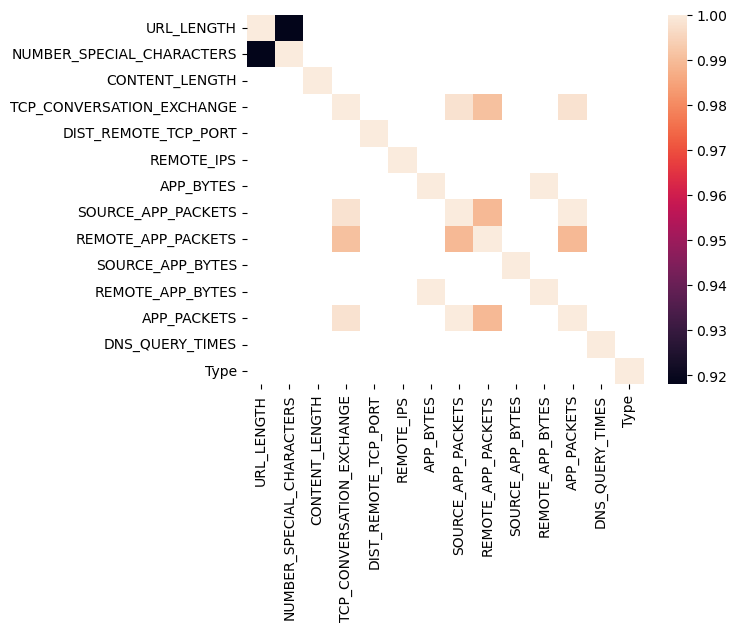

In [93]:
#create a heatmap using seaborn to visualize which column have a high correlation
import seaborn as sns
import matplotlib.pyplot as plt
# Create a mask to highlight correlations greater than 0.9 or less than -0.9
highlight_mask = np.abs(correlation_matrix) > 0.9
sns.heatmap(correlation_matrix, mask= ~highlight_mask)


# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [85]:
#remove columns with high correlation 
numerical_columns_drop_high_correlation = numerical_columns_df.drop(["REMOTE_APP_BYTES", "SOURCE_APP_PACKETS","TCP_CONVERSATION_EXCHANGE"], axis = 1)

In [89]:
# Your comment here
numerical_columns_drop_high_correlation
correlation_matrix_2 = numerical_columns_drop_high_correlation.corr()

<Axes: >

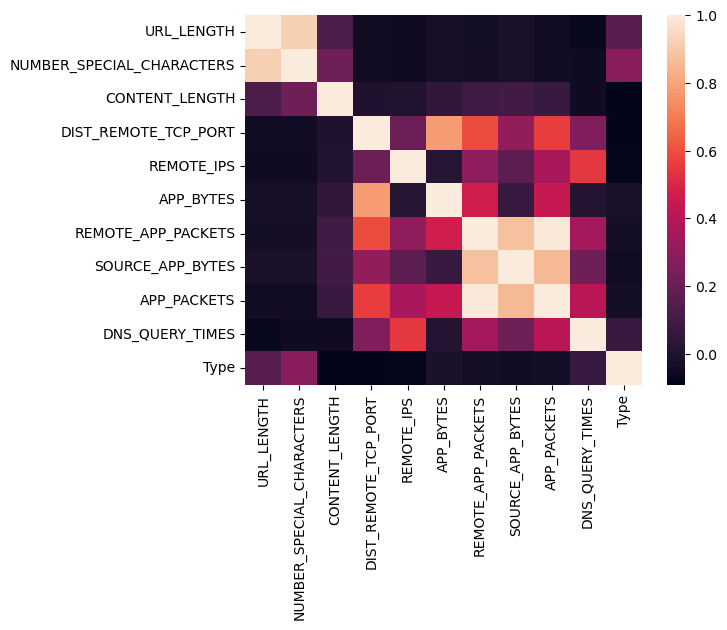

In [91]:
# Print heatmap again
sns.heatmap(correlation_matrix_2)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [95]:
#check for missing value in the main dataset
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [118]:
websites.shape

(1781, 21)

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [101]:
#drop the column with high missing value (content_length) and also drop the column with high correlation
websites_cleaned = websites.drop(["REMOTE_APP_BYTES", "SOURCE_APP_PACKETS","TCP_CONVERSATION_EXCHANGE", "CONTENT_LENGTH"], axis = 1)

In [112]:
#Drop rows with missing values
websites_cleaned_rows = websites_cleaned.dropna()

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [138]:
# Examine missing values in each column
websites_cleaned_rows.isna().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [140]:
websites_cleaned_rows.shape

(1257, 17)

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [164]:
#replace values in the WHOIS_COUNTRY column
websites_cleaned_rows.loc[:,'WHOIS_COUNTRY'] = websites_cleaned_rows['WHOIS_COUNTRY'].replace(
    {"us":"US", "[u'GB'; u'UK']":"GB", "ru":"RU", "UK":"GB"}
)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [168]:
# to check the value counts of the individual countires in the dataset
unique = websites_cleaned_rows['WHOIS_COUNTRY'].value_counts()
print(unique)

WHOIS_COUNTRY
US    960
CA     75
ES     63
AU     26
GB     22
PA     21
JP     10
IN      8
CZ      8
CN      8
RU      6
NL      5
CH      5
BS      4
AT      4
KY      3
PH      3
SC      3
UY      2
UA      2
KG      2
HK      2
SI      2
LV      1
PK      1
IL      1
DE      1
SE      1
IT      1
NO      1
BE      1
BY      1
AE      1
IE      1
UG      1
TR      1
Name: count, dtype: int64


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [223]:
websites_cleaned_rows['WHOIS_COUNTRY'].unique()

array(['US', 'OTHER', 'AU', 'CA', 'PA', 'IN', 'GB', 'JP', 'CN', 'CZ',
       'ES'], dtype=object)

In [175]:
#replace values in the WHOIS_COUNTRY column with other beyond the top 10
websites_cleaned_rows.loc[:,'WHOIS_COUNTRY'] = websites_cleaned_rows['WHOIS_COUNTRY'].replace({
    'SC': 'OTHER', 'RU': 'OTHER', 'NL': 'OTHER', 'UG': 'OTHER',
    'SI': 'OTHER', 'KY': 'OTHER', 'AT': 'OTHER', 'PH': 'OTHER',
    'LV': 'OTHER', 'TR': 'OTHER', 'HK': 'OTHER', 'UA': 'OTHER',
    'CH': 'OTHER', 'BS': 'OTHER', 'PK': 'OTHER', 'IL': 'OTHER',
    'DE': 'OTHER', 'SE': 'OTHER', 'IT': 'OTHER', 'NO': 'OTHER',
    'BE': 'OTHER', 'BY': 'OTHER', 'AE': 'OTHER', 'IE': 'OTHER',
    'UY': 'OTHER', 'KG': 'OTHER'
})

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [181]:
websites_cleaned_rows.shape

(1257, 17)

In [183]:
# dropping the column for'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'.
websites_cleaned_rows = websites_cleaned_rows.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis = 1)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [189]:
#Checking the data types again
websites_cleaned_rows.dtypes


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [191]:
# Your code here
websites_cleaned_rows = websites_cleaned_rows.drop(["URL"], axis = 1)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [195]:
#Print the unique value counts of CHARSET
websites_cleaned_rows["CHARSET"].value_counts()

CHARSET
UTF-8           520
utf-8           279
ISO-8859-1      275
us-ascii         98
iso-8859-1       83
windows-1251      1
windows-1252      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [199]:
#Print the unique value counts of SERVER
websites_cleaned_rows["SERVER"]

3                        nginx
5                        nginx
6                     Apache/2
7        Microsoft-HTTPAPI/2.0
10                      Apache
                 ...          
1776                    Apache
1777                    Apache
1778    Apache/2.2.16 (Debian)
1779          cloudflare-nginx
1780         Microsoft-IIS/8.5
Name: SERVER, Length: 1257, dtype: object

![Think Hard](../images/think-hard.jpg)

In [24]:
#We can take the top 10 serves and indicate the rest as others 


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [201]:
#check if each SERVER value contains any of Microsoft, Apache, and nginx in its strings and re-label them, for those without
#.... any of those substrings, label with Other
keywords = ["Microsoft", "Apache", "nginx"]
# Apply the labeling logic to the SERVER column
websites_cleaned_rows["SERVER"] = websites_cleaned_rows["SERVER"].apply(lambda x: next((key for key in keywords if key in x), "Other"))

In [203]:
# Count `SERVER` value counts here
websites_cleaned_rows["SERVER"].value_counts()

SERVER
Apache       491
nginx        322
Other        300
Microsoft    144
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [225]:
websites_cleaned_rows.sample(10)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
266,34,9,ISO-8859-1,Apache,US,0,5,2292,24,16147,23,2.0,0
316,36,8,ISO-8859-1,nginx,OTHER,0,4,372,10,703,8,2.0,1
50,24,6,us-ascii,Microsoft,CA,4,4,564,8,508,6,0.0,0
465,39,10,utf-8,nginx,US,5,5,912,4,244,12,0.0,0
960,52,10,UTF-8,Apache,US,0,0,0,0,0,0,0.0,0
726,45,10,UTF-8,Other,US,29,2,5852,39,37285,42,8.0,0
445,39,8,utf-8,Other,US,52,4,7271,68,60586,71,10.0,0
395,38,7,UTF-8,Apache,US,3,2,432,4,244,4,0.0,0
1700,114,19,UTF-8,nginx,CA,4,7,1062,11,702,15,0.0,0
538,40,9,utf-8,nginx,US,1,3,4229,36,32381,30,4.0,0


In [229]:
#conver the categorical data to ordinal data using get dummies.
CHARSET_dummy = pd.get_dummies(websites_cleaned_rows["CHARSET"], prefix = "CHARSET", drop_first= True).astype(int)
SERVER_dummy = pd.get_dummies(websites_cleaned_rows["SERVER"], prefix = "SERVER", drop_first= True).astype(int)
WHOIS_COUNTRY_dummy = pd.get_dummies(websites_cleaned_rows["WHOIS_COUNTRY"], prefix = "WHOIS_COUNTRY", drop_first= True).astype(int)

In [231]:
#concatenate the dummies with the rest of the data
website_dummy = pd.concat([websites_cleaned_rows,CHARSET_dummy,SERVER_dummy,WHOIS_COUNTRY_dummy], axis = 1)

In [237]:
website_dummy

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
3,17,6,ISO-8859-1,nginx,US,22,3,3812,37,18784,...,0,0,0,0,0,0,0,0,0,1
5,18,7,UTF-8,nginx,OTHER,6,9,894,13,838,...,0,0,0,0,0,0,0,1,0,0
6,18,6,iso-8859-1,Apache,US,0,3,1189,13,8559,...,0,0,0,0,0,0,0,0,0,1
7,19,6,us-ascii,Microsoft,US,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,20,6,utf-8,Apache,US,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,Apache,ES,0,0,0,3,186,...,0,0,0,1,0,0,0,0,0,0
1777,198,17,UTF-8,Apache,ES,0,0,0,2,124,...,0,0,0,1,0,0,0,0,0,0
1778,201,34,utf-8,Apache,US,2,6,6631,89,132181,...,0,0,0,0,0,0,0,0,0,1
1779,234,34,ISO-8859-1,nginx,US,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [239]:
#drop the strings value that has been converted to dummies
website_dummy = website_dummy.drop(["CHARSET","SERVER","WHOIS_COUNTRY"], axis = 1)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [245]:
#inspect website_dummy to make sure the data and types are intended
website_dummy.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_UTF-8                  int32
CHARSET_iso-8859-1             int32
CHARSET_us-ascii               int32
CHARSET_utf-8                  int32
CHARSET_windows-1251           int32
CHARSET_windows-1252           int32
SERVER_Microsoft               int32
SERVER_Other                   int32
SERVER_nginx                   int32
WHOIS_COUNTRY_CA               int32
WHOIS_COUNTRY_CN               int32
WHOIS_COUNTRY_CZ               int32
WHOIS_COUNTRY_ES               int32
WHOIS_COUNTRY_GB               int32
WHOIS_COUNTRY_IN               int32
WHOIS_COUNTRY_JP               int32
WHOIS_COUNTRY_OTHER            int32
W

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [249]:
X = website_dummy.drop(["Type"], axis = 1)
y = website_dummy["Type"]

In [251]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state= 1)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [255]:
#loading LogisticRegression model
from sklearn.linear_model import LogisticRegression
model_regression = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [259]:
#fit the model to the training dataset
model_regression.fit(X_train,y_train)
model_regression.score(X_test,y_test)

C:\Users\somoy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9007936507936508

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [263]:
#predict the y values from the test data
y_pred = model_regression.predict(X_test)

In [265]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)
accuracy_s = accuracy_score(y_test,y_pred)
print(accuracy_s)

[[227   0]
 [ 25   0]]
0.9007936507936508


In [ ]:
#What are your thoughts on the performance of the model? Write your conclusions below.
"""
The result shows that although the model has a good accuracy of 90%, there is a case of inbalance in the data especially on the true positives

Further breaks down as follows:

227 True Negatives (TN): Correctly predicted as negative.
0 False Positives (FP): No instances of the negative class were misclassified as positive.
25 False Negatives (FN): Positive cases were misclassified as negative.
0 True Positives (TP): No positive cases were correctly classified.


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [278]:
#Using K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
K_model = KNeighborsClassifier(n_neighbors= 3)
K_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [294]:
#predict the y values from the test data using K nearest neighbor
import numpy as np

# Ensure X_test is a NumPy array
X_test = np.array(X_test)
y_pred_3 = K_model.predict(X_test)

C:\Users\somoy\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [296]:
confusion_mat_K_neig_3 = confusion_matrix(y_test,y_pred_3)
print(confusion_mat_K_neig_3)
accuracy_s_K_neig_3 = accuracy_score(y_test,y_pred_3)
print(accuracy_s_K_neig_3)

[[215  12]
 [  7  18]]
0.9246031746031746


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [298]:
#Using K nearest neighbor with 5 neighbors
from sklearn.neighbors import KNeighborsClassifier
K_model_5 = KNeighborsClassifier(n_neighbors= 5)
K_model_5.fit(X_train, y_train)
y_pred_5 = K_model_5.predict(X_test)

C:\Users\somoy\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [300]:
confusion_mat_K_neig_5 = confusion_matrix(y_test,y_pred_5)
print(confusion_mat_K_neig_5)
accuracy_s_K_neig_5 = accuracy_score(y_test,y_pred_5)
print(accuracy_s_K_neig_5)

[[218   9]
 [  7  18]]
0.9365079365079365


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [37]:
# Your conclusions here:
#Yes the accuracy score improved,however, the true negative reduce and the true positive increased


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [38]:
# Your code here